In [1]:
!pip install opencv-python-headless

carga de librerías

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

 Cargar una imagen en color

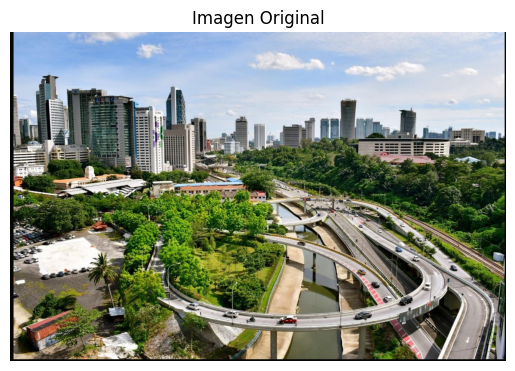

In [18]:
# Cargar imagen en BGR (formato por defecto de OpenCV)
image = cv2.imread('Captura_paisaje.JPG')  # Cambia esta ruta si estás en local

# Convertir a RGB para mostrar correctamente con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis("off")
plt.show()

 Acceder a canales RGB y HSV por separado

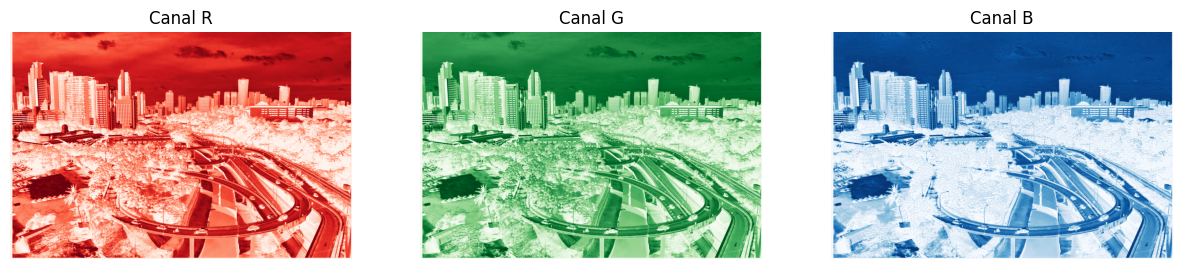

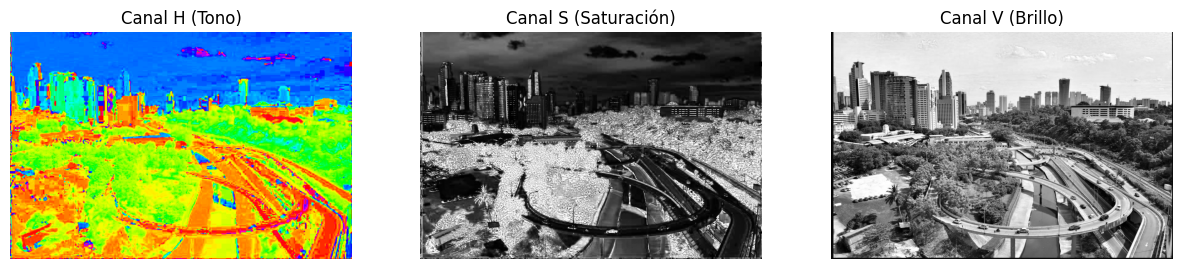

In [19]:
# Separar canales RGB
r, g, b = cv2.split(image_rgb)

# Mostrar cada canal individualmente
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r, cmap='Reds'); axs[0].set_title("Canal R")
axs[1].imshow(g, cmap='Greens'); axs[1].set_title("Canal G")
axs[2].imshow(b, cmap='Blues'); axs[2].set_title("Canal B")
for ax in axs: ax.axis('off')
plt.show()

# Convertir a HSV y separar canales
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_hsv)

# Mostrar canales HSV
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(h, cmap='hsv'); axs[0].set_title("Canal H (Tono)")
axs[1].imshow(s, cmap='gray'); axs[1].set_title("Canal S (Saturación)")
axs[2].imshow(v, cmap='gray'); axs[2].set_title("Canal V (Brillo)")
for ax in axs: ax.axis('off')
plt.show()

 Modificar una región específica (slicing)



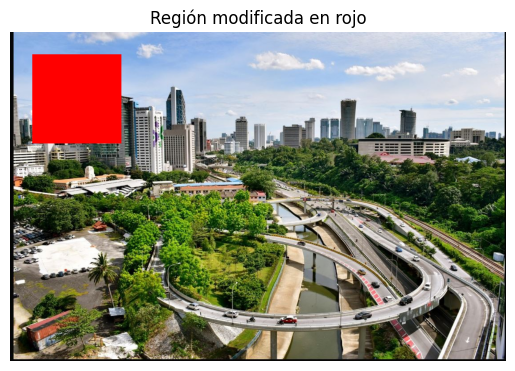

In [20]:
# Copia de la imagen para modificar
mod_img = image_rgb.copy()

# Cambiar un rectángulo (por ejemplo, del (50, 50) al (250, 250)) a color rojo puro
mod_img[50:250, 50:250] = [255, 0, 0]  # Rojo en formato RGB

# Mostrar resultado
plt.imshow(mod_img)
plt.title("Región modificada en rojo")
plt.axis("off")
plt.show()

Sustituir una región por otra

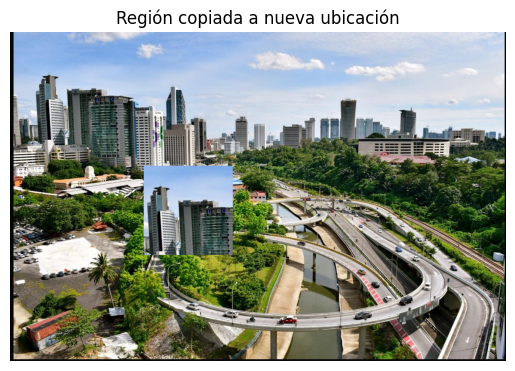

In [21]:
# Definir dos regiones
source_region = image_rgb[50:250, 50:250]
image_copy = image_rgb.copy()
# Copiar la región a otra parte (por ejemplo, (200:300, 200:300))
image_copy[300:500, 300:500] = source_region

# Mostrar resultado
plt.imshow(image_copy)
plt.title("Región copiada a nueva ubicación")
plt.axis("off")
plt.show()

 Calcular y visualizar histogramas de color

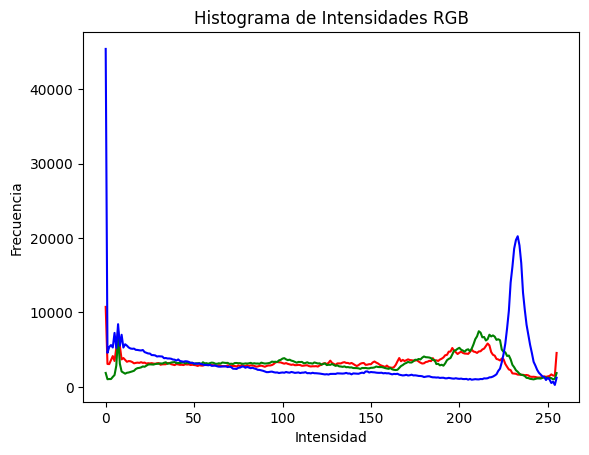

In [22]:
# Histograma RGB con Matplotlib
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title("Histograma de Intensidades RGB")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.show()

 Ajuste manual de brillo y contraste

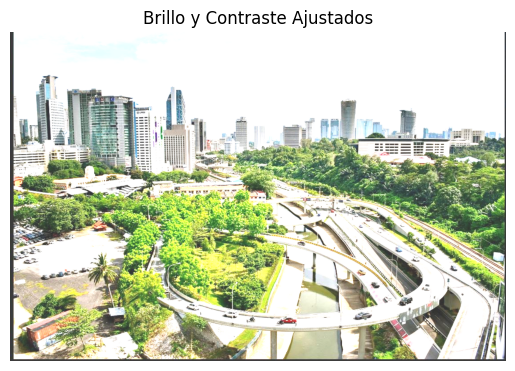

In [23]:
# Ajuste manual con ecuación: nueva = alpha * imagen + beta
alpha = 1.5  # Contraste (>1 más contraste)
beta = 50    # Brillo (+ valor más brillante)

# Ajustar
bright_contrast = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# Mostrar
plt.imshow(bright_contrast)
plt.title("Brillo y Contraste Ajustados")
plt.axis("off")
plt.show()